Shazer Rizzo
Astro 19 Final

3) Follow the tutorial found at https://sep.readthedocs.io/en/v1.0.x/tutorial.html

Links to an external site., but use the astropy fits routines instead of fitsio. Create a notebook that performs the tutorial and comment it using Markdown to explain what it’s doing. Note that the fits image used in the tutorial can be acquired via the sep GitHub account.

4) Augment the tutorial to save each of the four figures to PNG files.

5) Get the f105w band image of the Hubble Ultra Deep Field, which is called

hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits

6) Redo the tutorial steps in a second notebook, but on the UDF f105w image. How many sources do you find? Histogram their fluxes.

7) What are the mean, median, and standard deviation of the distribution of fluxes. What is the largest outlier in the distribution, where is it on the image, and how many standard deviations is it away from the mean? 

8) Download the f125w and f160w images of the HUDF at the same website, and make a 3-color false image of the UDF using RGB -> f160w, f125w, f105w. Save the image as a PNG.

In [1]:
import numpy as np
import sep

In [2]:
# additional setup for reading the test image and displaying plots
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

In [3]:
# read image into standard 2-d numpy array
rcParams['figure.figsize']=[10.,8.]
data = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
data = data.byteswap().newbyteorder()

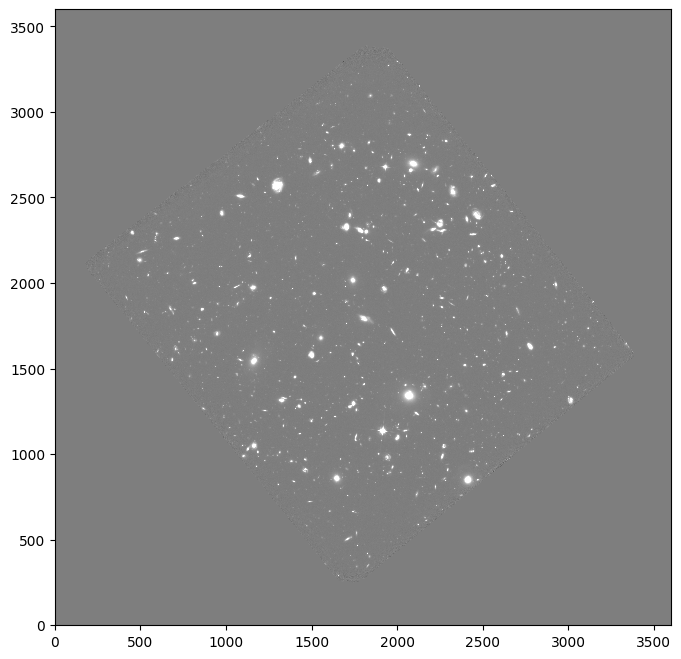

In [4]:
#Image 1
m,s = np.mean(data),np.std(data)

plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.savefig('FinalImage1.png', dpi=600, bbox_inches='tight')

taking the data from the fits file, the 

In [5]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

In [6]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [7]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

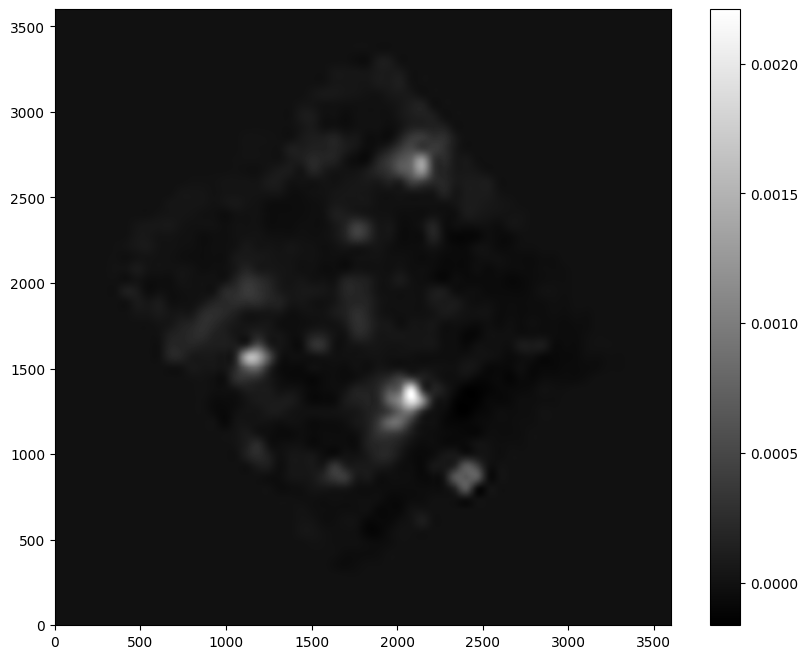

In [8]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('FinalImage2.png', dpi=600, bbox_inches='tight')
plt.colorbar();

The Da

In [9]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

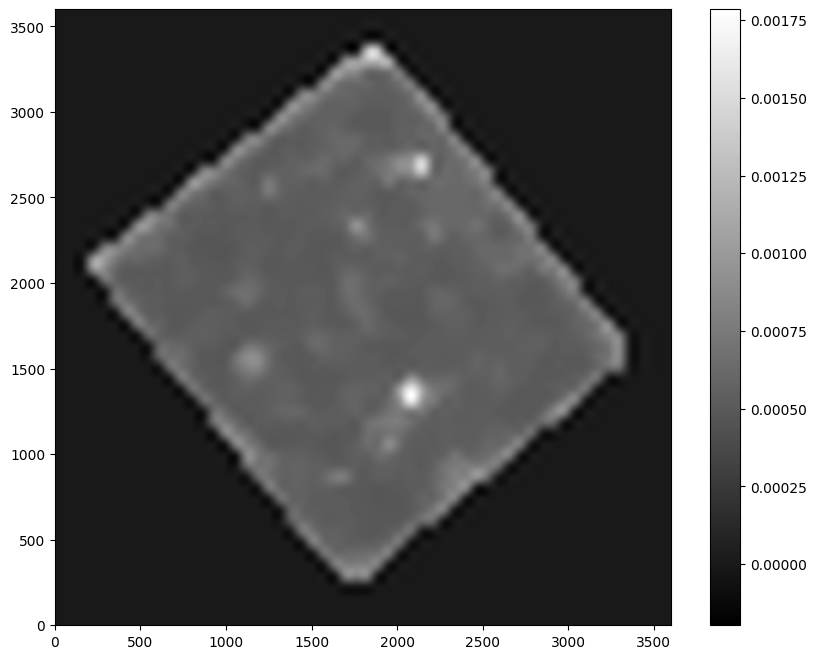

In [10]:
# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.savefig('FinalImage3.png', dpi=600, bbox_inches='tight')
plt.colorbar();

The da

In [11]:
# subtract the background
data_sub = data - bkg

In [12]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [13]:
# how many objects were detected
len(objects)

8640

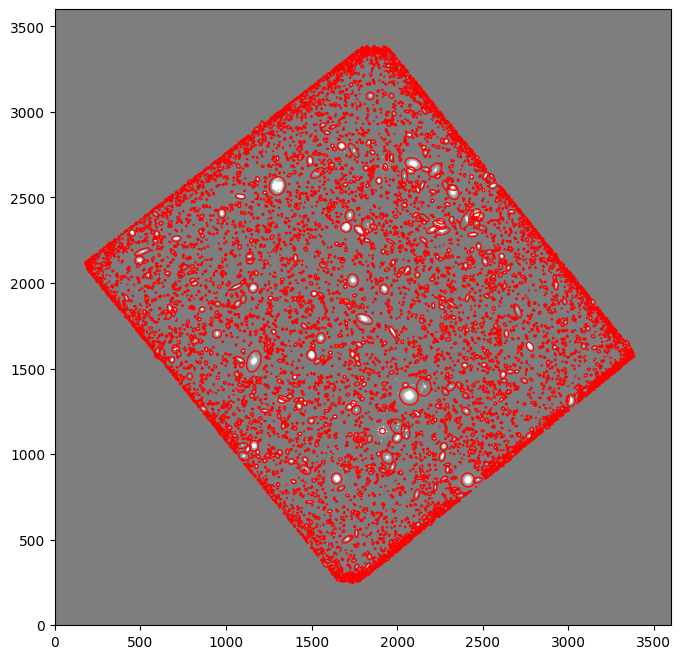

In [14]:
from matplotlib.patches import Ellipse

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('FinalImage4.png', dpi=600, bbox_inches='tight')

The D

In [15]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [17]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


C:\Users\Shazer\AppData\Local\Temp\ipykernel_17820\1362523754.py:2: RuntimeWarning: invalid value encountered in log10
  log_flux_values = np.log10(flux)


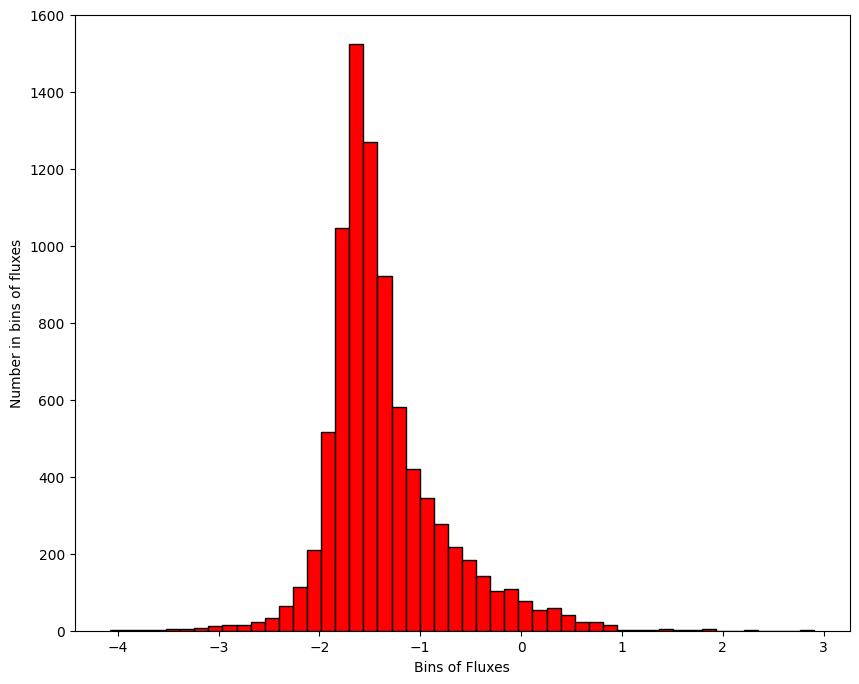

In [18]:
#Histogram of fluxes
log_flux_values = np.log10(flux)
plt.hist(log_flux_values, bins=50, color='red', edgecolor='black')
plt.xlabel('Bins of Fluxes')
plt.ylabel('Number in bins of fluxes')
plt.savefig('FinalImage5.png', dpi=600, bbox_inches='tight')
plt.show()

Calculate the mean, median, and standard deviation of the distribution of fluxes. What is the largest outlier in the distribution, where is it on the image, and how many standard deviations is it away from the mean? 

In [25]:
#Mean
mean = np.mean(flux)
print('Mean:',mean)
#Median
median = np.median(flux)
print('Median:', median)
#Standard Deviation
std = np.std(flux)
print('Standard Deviation:', std)
#Largest Outlier
threshold = 3
outliers = []
for x in flux:
    z_score = (x - mean) / std
    if (abs(z_score) > threshold):
        outliers.append(x)
        outliers.append(z_score)
print('Outlier:', outliers[0])
print('STD of Outlier:', outliers[1])
#How many standard deviations is it away from the normal


Mean: 0.36185728037707154
Median: 0.030960064365426664
Standard Deviation: 9.243528029706706
Outlier: 72.33984953880311
STD of Outlier: 7.78685281497544


Download the f125w and f160w images of the HUDF at the same website, and make a 3-color false image of the UDF using RGB -> f160w, f125w, f105w. Save the image as a PNG.

In [33]:
# define file names
fdata_1 = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"
fdata_2 = "hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits"
fdata_3 = "hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits"

# read in data
hdu_2 = fits.open(fdata_1)
hdu_3 = fits.open(fdata_2)
hdu_4 = fits.open(fdata_3)

# get the image data
data_2 = hdu_2[0].data
data_3 = hdu_3[0].data
data_4 = hdu_4[0].data

In [34]:
def rescale_image(data):
    # copy the data to avoid accidentaly overwriting it
    pdata_tmp = data.copy()

    # compute the mean value over all data, excluding NaN (Not a Number)
    m = np.nanmean(pdata_tmp)

    # if lower than vpmin, apply vpmin
    # if higher than vpmax, apply vpmax
    vpmin = 0.5*m
    vpmax = 100*m
    pdata_tmp[pdata_tmp<vpmin] = vpmin
    pdata_tmp[pdata_tmp>vpmax] = vpmax

    #apply logscale
    pdata_tmp = np.log10(pdata_tmp)
    return pdata_tmp

In [35]:
def fits_quicklook(data,fnx=10,fny=10):
    f = plt.figure(figsize=(fnx,fny))
    pdata_tmp = rescale_image(data)
    plt.imshow(pdata_tmp)

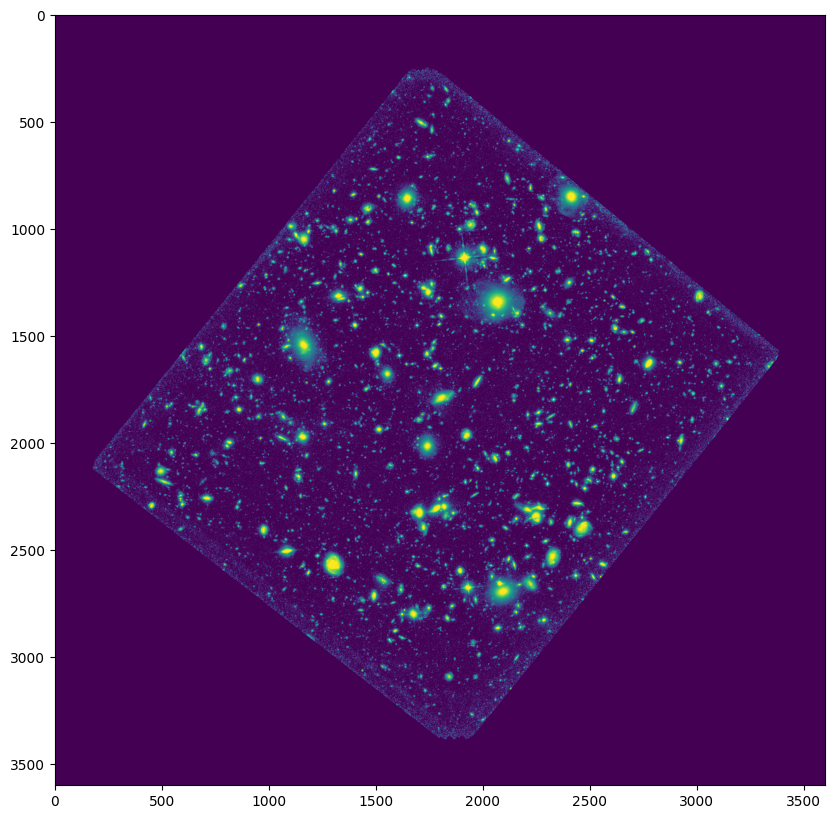

In [36]:
fits_quicklook(data_2)

In [38]:
##Use the rescale image
data_2_res = rescale_image(data_2)
data_3_res = rescale_image(data_3)
data_4_res = rescale_image(data_4)

In [40]:
data_all = np.zeros([data_2.shape[0],data_2.shape[1],3])

data_all[:,:,0] = data_2
data_all[:,:,1] = data_3
data_all[:,:,2] = data_4

data_all = rescale_image(data_all)

In [41]:
def remap(data):
    #copy the data to avoid accidentatly overwriting it
    pdata_tnp = data.copy()

    dmin = pdata_tnp.min()
    dmax = pdata_tnp.max()
    return (pdata_tnp - dmin)/(dmax-dmin)

In [42]:
rgb_image = np.zeros([data_2.shape[0],data_2.shape[1],3])
rgb_image = remap(data_all)

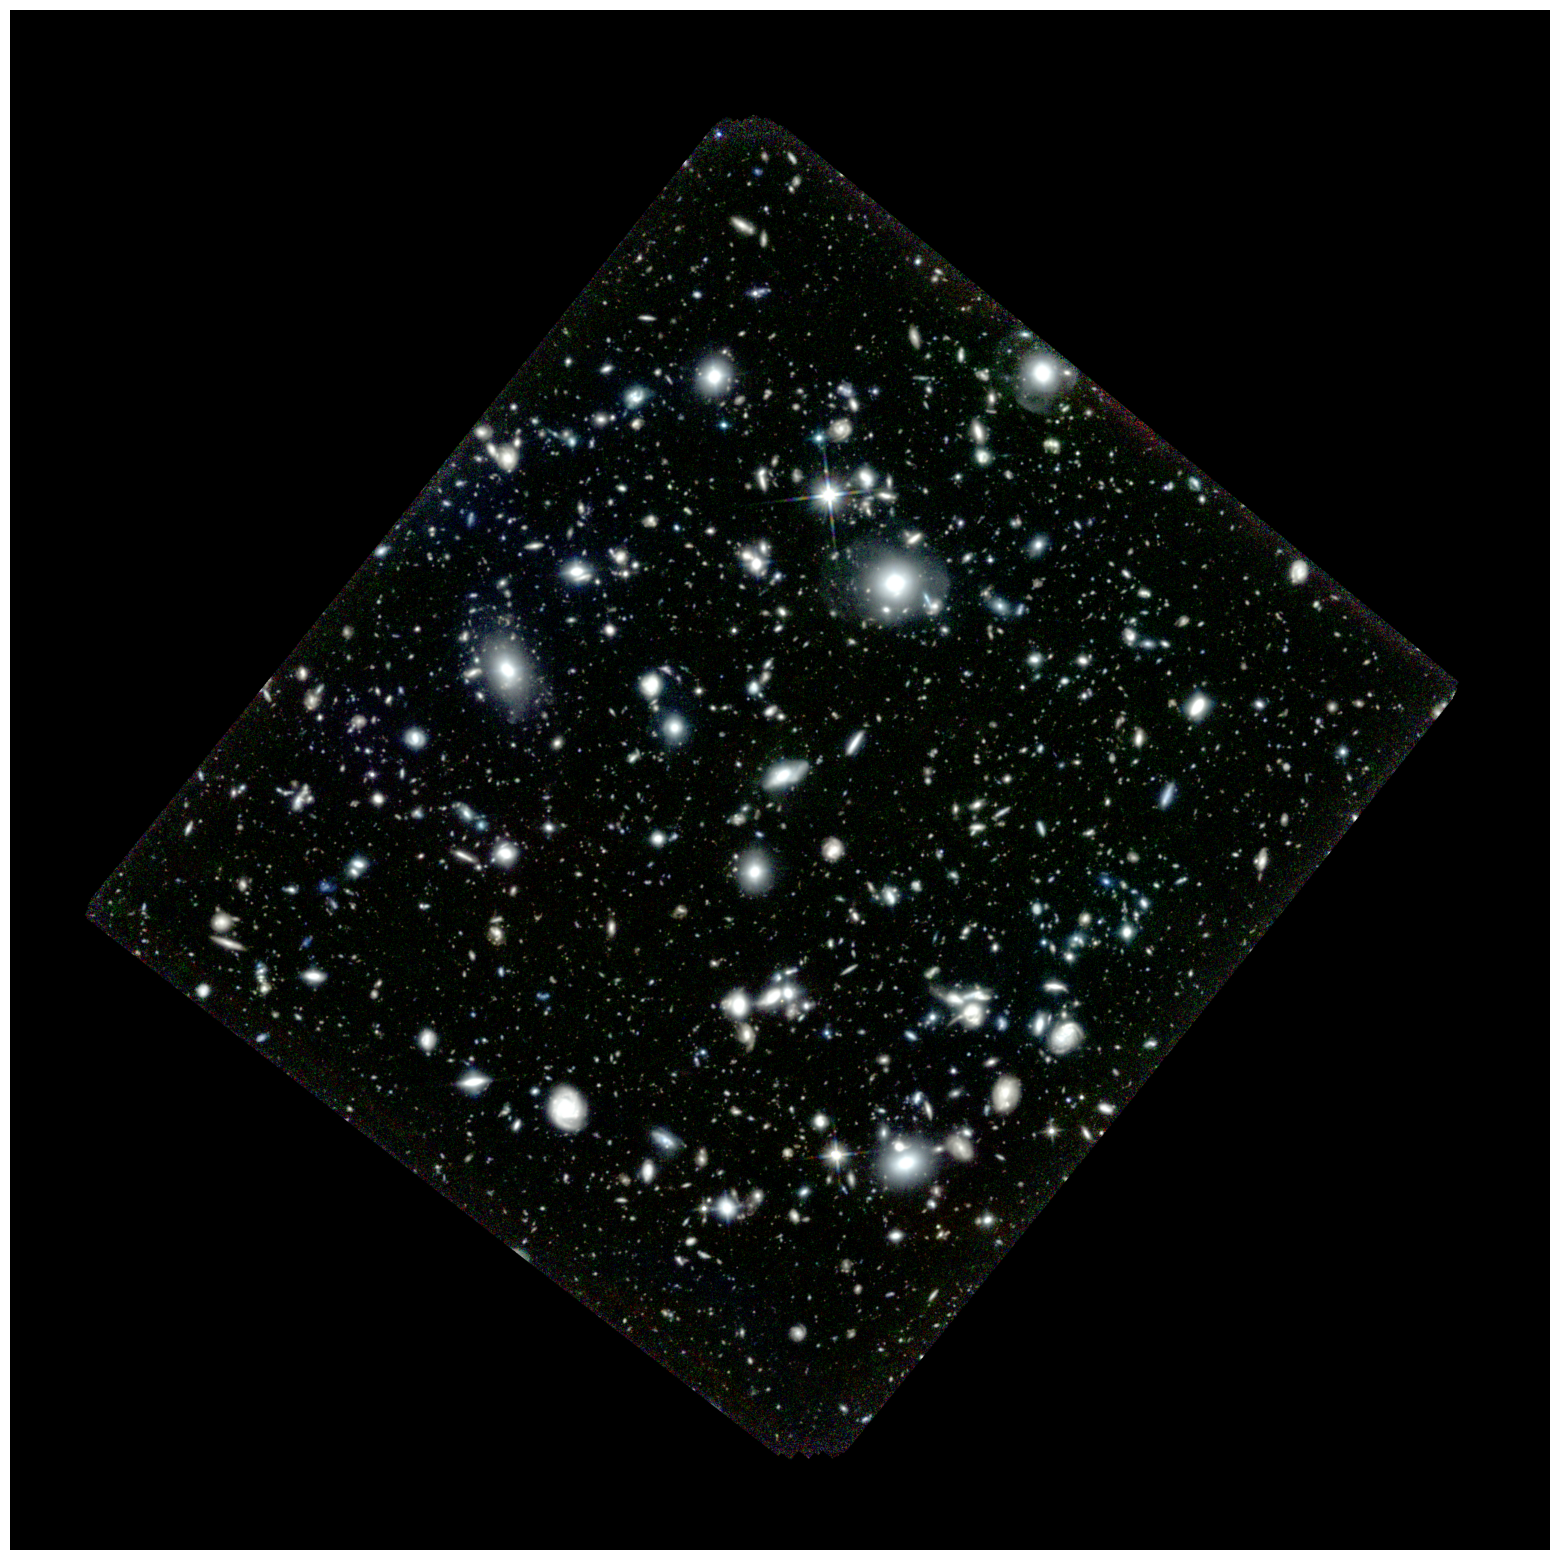

In [43]:
f,ax = plt.subplots(1,1,figsize=(20,20))
ax.axis('off')
ax.imshow(rgb_image)
plt.savefig('FinalImage6.png', dpi=600, bbox_inches='tight')